Compute and plot interpolation polynomials to $$ \frac{1}{x^2+1}$$ on the interval [−5,5], for n ∈ {10,20,40}. Choose uniformly distributed points, and Chebyshev points on [−5,5]: 
$x_i= 5 cos\frac{(i+0.5)\pi}{n+1}$ for $i= 0,...,n$.

Plot the Lagrange interpolation polynomials $l_i$ for both choices of points.
Investigate numerically 
$$ max_{i∈\{0,...,n\}}  max_{x∈[−5,5]}|li(x)|$$ and $$max_{x∈[−5,5]} \sum_{i=0}^n |li(x)|$$ depending on n.

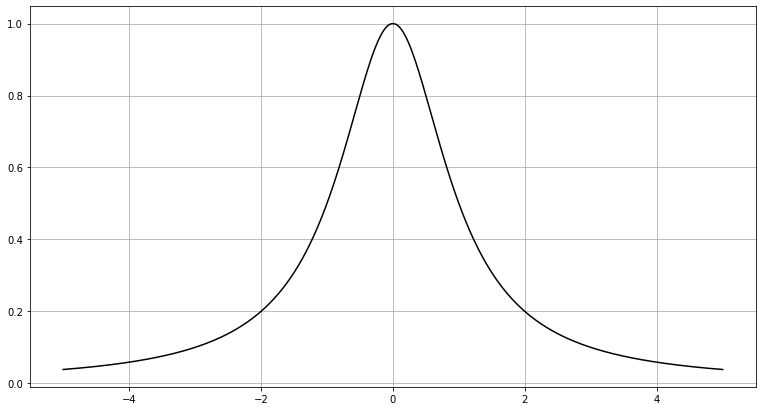

In [98]:
import numpy as np
import matplotlib.pyplot as plt

x_interval = (-5, 5)
x_vector = np.linspace(x_interval[0], x_interval[1], 1000)

y_fun = 1/(x_vector**2+1)
plt.figure(figsize = (13, 7))
plt.grid()
plt.plot(x_vector, y_fun, 'k')
plt.grid()

In [89]:
def Lagrange (pts, i, x):
    prod = 1
    for j in range(len(pts)):
        if j != i:
            prod = prod * (x-pts[j])/(pts[i]-pts[j])
    return prod    

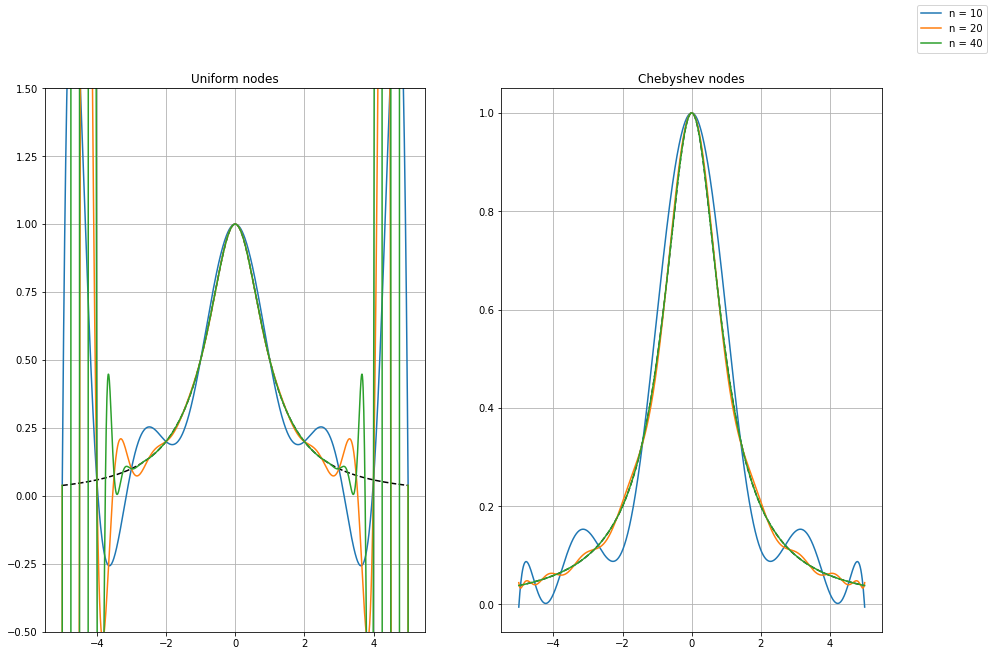

In [99]:
n_list = (10, 20, 40)

fig, axes = plt.subplots(1,2, figsize = (15, 10))
axes[0].plot(x_vector, y_fun, '--k')
axes[1].plot(x_vector, y_fun, '--k')

li_uniform_list = []
li_chebyshev_list = []

for n_idx, n in enumerate(n_list):   
    i = np.arange(n+1)
    
    current_li_uniform_matrix = np.empty((len(x_vector), n+1))
    current_li_chebyshev_matrix = np.empty((len(x_vector), n+1))
    
    uniform_nodes = np.linspace(x_interval[0], x_interval[1], n+1)
    chebyshev_nodes = 5*np.cos(np.pi * (i+0.5)/(n+1))
    
    fi_uniform = 1/(uniform_nodes**2+1)
    fi_chebyshev = 1/(chebyshev_nodes**2+1)
        
    for current_i in i:
        li_uniform = Lagrange(uniform_nodes, current_i, x_vector)
        li_chebyshev = Lagrange(chebyshev_nodes, current_i, x_vector)
        
        current_li_uniform_matrix[:, current_i] = li_uniform
        current_li_chebyshev_matrix[:, current_i] = li_chebyshev
        
    
    P_uniform = np.sum(current_li_uniform_matrix * fi_uniform.reshape((-1, n+1)), axis=1)
    P_chebyshev = np.sum(current_li_chebyshev_matrix * fi_chebyshev.reshape((-1, n+1)), axis=1)
    axes[0].plot(x_vector, P_uniform, label="n = "+str(n))
    axes[1].plot(x_vector, P_chebyshev)
           
        
    li_uniform_list.append(current_li_uniform_matrix)
    li_chebyshev_list.append(current_li_chebyshev_matrix)
        
axes[0].set_ylim([-0.5, 1.5])
fig.legend()
axes[0].grid()
axes[1].grid()
axes[0].set_title("Uniform nodes")
axes[1].set_title("Chebyshev nodes")
axes[0].grid()
axes[1].grid()

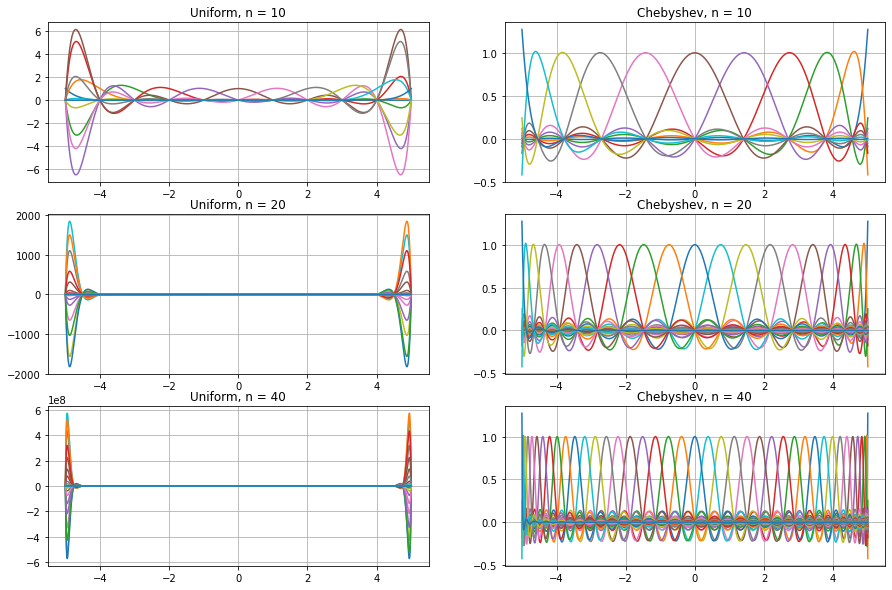

In [91]:
fig, axes = plt.subplots(3, 2, figsize = (15, 10))

for n_idx, n in enumerate(n_list):   
    axes[n_idx][0].plot(x_vector, li_uniform_list[n_idx])
    axes[n_idx][1].plot(x_vector, li_chebyshev_list[n_idx])
    
    axes[n_idx][0].set_title("Uniform, n = " + str(n))
    axes[n_idx][1].set_title("Chebyshev, n = " + str(n))

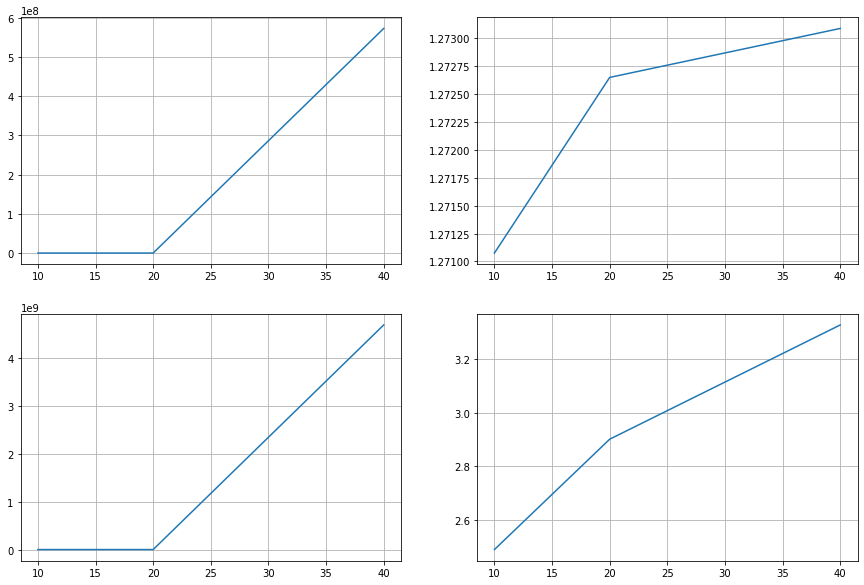

In [92]:
max_max_li_uni = []
max_max_li_che = []
max_sum_li_uni = []
max_sum_li_che = []

for n_idx, n in enumerate(n_list):
    
    np.amax(np.abs(li_chebyshev_list[n_idx]))
    
    max_max_li_uni.append(np.amax(np.abs(li_uniform_list[n_idx])))
    max_max_li_che.append(np.amax(np.abs(li_chebyshev_list[n_idx])))
                          
    max_sum_li_uni.append(np.amax(np.sum(np.abs(li_uniform_list[n_idx]), axis=1)))
    max_sum_li_che.append(np.amax(np.sum(np.abs(li_chebyshev_list[n_idx]), axis=1)))
    
plt.rcParams['axes.grid'] = True
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

axes[0][0].plot(n_list, max_max_li_uni)
axes[0][1].plot(n_list, max_max_li_che)

axes[1][0].plot(n_list, max_sum_li_uni)
axes[1][1].plot(n_list, max_sum_li_che)

